In [1]:
from google.colab import files
uploaded = files.upload()

Saving car.csv to car.csv


In [2]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Optional for saving model
import joblib


In [3]:
import pandas as pd

df = pd.read_csv("car.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [5]:
# Create 'Car_Age' feature
df['Car_Age'] = 2025 - df['Year']
df.drop(['Year'], axis=1, inplace=True)

# Drop Car_Name if it exists
if 'Car_Name' in df.columns:
    df.drop(['Car_Name'], axis=1, inplace=True)

# Encode categorical features
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Seller_Type'] = le.fit_transform(df['Seller_Type'])
df['Transmission'] = le.fit_transform(df['Transmission'])

df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,2,0,1,0,11
1,4.75,9.54,43000,1,0,1,0,12
2,7.25,9.85,6900,2,0,1,0,8
3,2.85,4.15,5200,2,0,1,0,14
4,4.60,6.87,42450,1,0,1,0,11


In [6]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = mse ** 0.5

print("✅ Random Forest Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

✅ Random Forest Performance:
R² Score: 0.9593
Mean Squared Error: 0.9372
Root Mean Squared Error: 0.9681


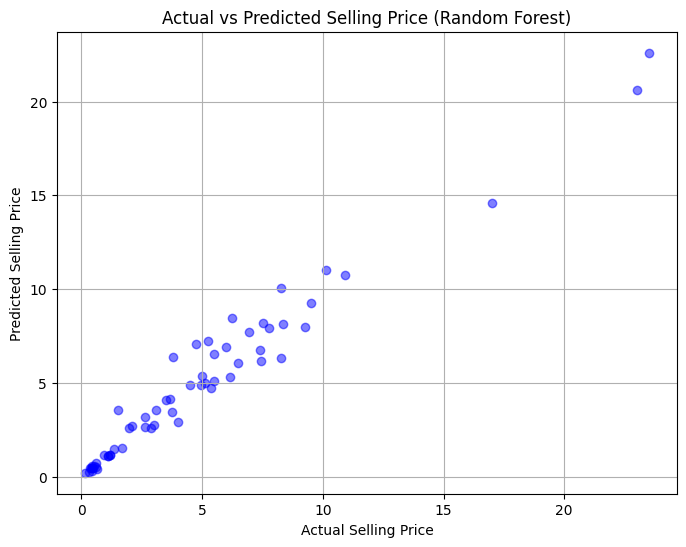

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price (Random Forest)")
plt.grid(True)
plt.show()


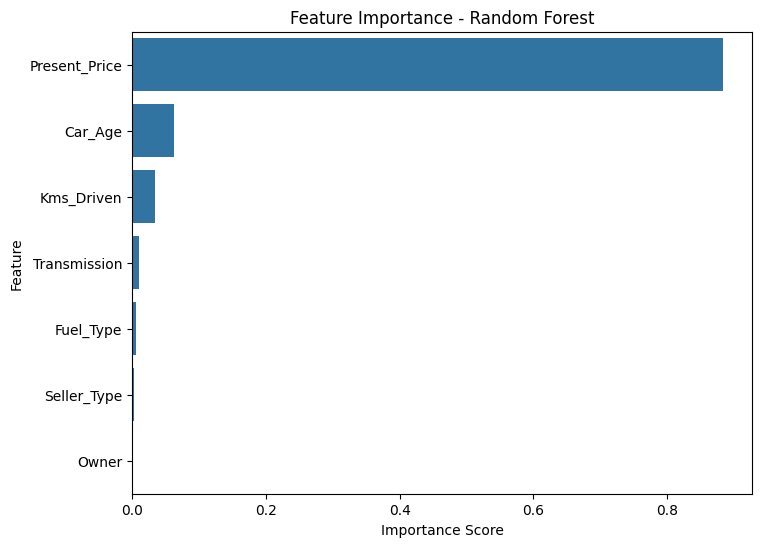

In [9]:
import seaborn as sns

# Get feature importance
feature_importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [10]:

import joblib
joblib.dump(rf, 'car_price_model.pkl')

['car_price_model.pkl']

In [11]:
# Load the model
import joblib
model = joblib.load("car_price_model.pkl")

# Preprocessing function
def preprocess_input(price_rs, kms, fuel, seller, transmission, owner, year):
    # Convert showroom price from ₹ to lakhs
    price_lakhs = price_rs / 100000

    # Calculate car age
    current_year = 2025
    car_age = current_year - year
    car_age = max(car_age, 0)  # Prevent negative age

    # Prevent invalid KM/price
    kms = max(kms, 0)
    price_lakhs = max(price_lakhs, 0)

    # Encode fuel
    fuel_map = {'Diesel': 0, 'CNG': 1, 'Petrol': 2}
    fuel_encoded = fuel_map.get(fuel, 2)

    # Encode seller
    seller_map = {'Dealer': 0, 'Individual': 1}
    seller_encoded = seller_map.get(seller, 0)

    # Encode transmission
    trans_map = {'Automatic': 0, 'Manual': 1}
    trans_encoded = trans_map.get(transmission, 1)

    return [[price_lakhs, kms, fuel_encoded, seller_encoded, trans_encoded, owner, car_age]]

# ✅ Example usage
input_data = preprocess_input(
    price_rs=850000,         # in ₹, not lakhs
    kms=80000,
    fuel='CNG',
    seller='Dealer',
    transmission='Manual',
    owner=0,
    year=2022
)

predicted_price = model.predict(input_data)
print(f"Predicted Selling Price: ₹{predicted_price[0]:.2f} Lakhs")

Predicted Selling Price: ₹6.41 Lakhs


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [13]:
!pip install gradio --quiet
import gradio as gr
import joblib

# Load your trained model
model = joblib.load("car_price_model.pkl")

# Preprocessing function
def preprocess_input(price_rs, kms, fuel, seller, transmission, owner, age):
    price_lakhs = max(price_rs / 100000, 0)
    kms = max(kms, 0)
    age = max(age, 0)

    fuel_map = {'Diesel': 0, 'CNG': 1, 'Petrol': 2}
    seller_map = {'Dealer': 0, 'Individual': 1}
    trans_map = {'Automatic': 0, 'Manual': 1}

    fuel_encoded = fuel_map.get(fuel, 2)
    seller_encoded = seller_map.get(seller, 0)
    trans_encoded = trans_map.get(transmission, 1)

    return [[price_lakhs, kms, fuel_encoded, seller_encoded, trans_encoded, owner, age]]

# Prediction function
def predict_price(Showroom_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner, Car_Age):
    features = preprocess_input(Showroom_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner, Car_Age)
    prediction = model.predict(features)[0]
    return f"💰 Estimated Selling Price: ₹{prediction:.2f} Lakhs"

# Define custom CSS for styling
custom_css = """
body {
    background-color: #f5f7fa;
}
h1, h2 {
    color: #2c3e50;
}
.gr-button {
    background-color: #2ecc71 !important;
    color: white !important;
    border-radius: 10px !important;
}
.gr-button:hover {
    background-color: #27ae60 !important;
}
.gr-input, .gr-number, .gr-radio {
    border-radius: 10px !important;
}
"""

# Create Gradio interface
gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Number(label="💵 Showroom Price (₹)", minimum=100000),
        gr.Number(label="🚗 KMs Driven", minimum=0),
        gr.Radio(['Petrol', 'Diesel', 'CNG'], label="⛽ Fuel Type"),
        gr.Radio(['Dealer', 'Individual'], label="👤 Seller Type"),
        gr.Radio(['Manual', 'Automatic'], label="⚙️ Transmission"),
        gr.Number(label="🔁 Previous Owners", minimum=0, step=1),
        gr.Number(label="📅 Car Age (Years)", minimum=0, maximum=35, step=1)
    ],
    outputs=gr.Textbox(label="📊 Result"),
    title="🚗 Car Selling Price Predictor",
    description="Enter your car details to estimate the resale value (in lakhs). Powered by ML model.",
    theme="default",
    css=custom_css
).launch()




It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f965928ad32c8cbf29.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
